## 4 Setting up differential equations (Measles)
Set up the SEIR model of the transmission dynamics of measles in a closed population using differential equations: 
We assume that individuals mix randomly and parameter values are given as follows: 
* Population 100,000 people
* Pre-infectious period 8 days
* Infectious period 7 days
* Basic reproduction number 13
* Life Expectancy 70 years
* Initial values (S,E,I,R)=(99999,0,1,0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

### PART I: Setting up differential equations


#### 1. Plot a graph for number of susceptible, pre-Infectious, infectious, and recovered populations during 150 days.

In [2]:
# Setting up Differential Equation
N = 100000
pre_inf = 8
D = 7
R_0 = 13
life = 70*365
# variable
f = 1/pre_inf
gamma = 1/D
beta = R_0/(N*D)
#initial value
S0 = 99999 ; E0 = 0 ; I0 = 1 ; R0 = 0

Define ODE function

In [3]:
def ODE_SEIR(y,t):
    yp = np.zeros((4))
    yp[0] = -beta*y[0]*y[2]
    yp[1] = beta*y[0]*y[2]-f*y[1]
    yp[2] = f*y[1]-gamma*y[2]
    yp[3] = gamma*y[2]
    return yp

In [4]:
tspan = 150
dt = 1
t_stamp = np.arange(1,tspan,dt)
initial = np.array([S0,E0,I0,R0])

# Solve the ODE equation
SEIR = spi.odeint(ODE_SEIR, initial, t_stamp)
S = SEIR[:,0]; E = SEIR[:,1]; I = SEIR[:,2] ;R = SEIR[:,3]

Text(0.5, 1.0, 'SEIR model using Differential eq.')

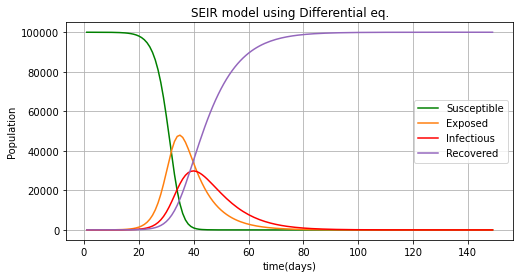

In [5]:
plt.figure(figsize = (8,4))
plt.plot(t_stamp,S,label='Susceptible',color='g')
plt.plot(t_stamp,E,label='Exposed',color='#ff7f0e')
plt.plot(t_stamp,I,label='Infectious',color='r')
plt.plot(t_stamp,R,label='Recovered',color='#9467bd')
plt.legend(loc='best')
plt.xlabel('time(days)')
plt.ylabel('Population')
plt.grid()
plt.title('SEIR model using Differential eq.')

#### 2. How does the graph change if you change the pre-infectious period to be 5 days and 20 days, respectively?

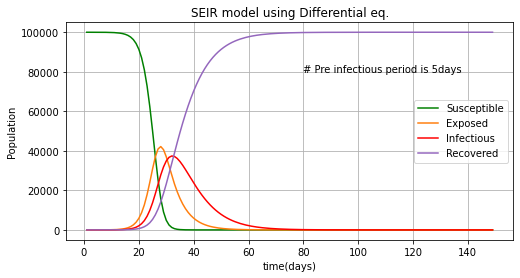

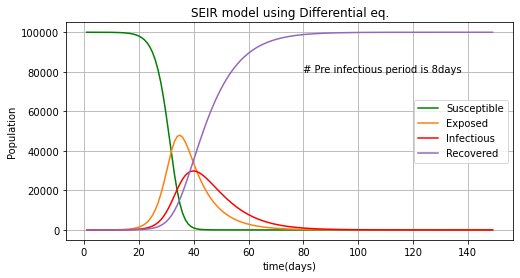

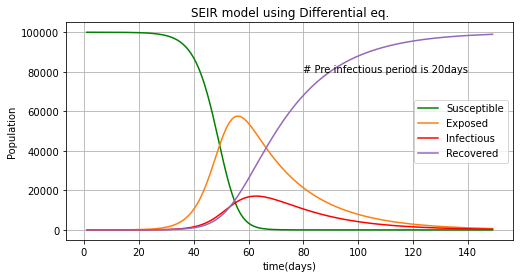

In [6]:
pre_inf = np.array([5,8,20])
f = 1/pre_inf
n = f.size
S = np.zeros([n,tspan-1])
E = np.zeros([n,tspan-1])
I = np.zeros([n,tspan-1])
R = np.zeros([n,tspan-1])
initial = np.array([S0,E0,I0,R0])
for j in range(n):
    def ODE_SEIR_preinf(y,t):
        yp = np.zeros((4))
        yp[0] = -beta*y[0]*y[2]
        yp[1] = beta*y[0]*y[2]-f[j]*y[1]
        yp[2] = f[j]*y[1]-gamma*y[2]
        yp[3] = gamma*y[2]
        return yp
    SEIR = spi.odeint(ODE_SEIR_preinf, initial, t_stamp)
    S[j,:] = SEIR[:,0]; E[j,:]= SEIR[:,1]; I[j,:] = SEIR[:,2] ;R[j,:] = SEIR[:,3]
    plt.figure(figsize = (8,4))
    plt.plot(t_stamp,S[j,:],label='Susceptible',color='g')
    plt.plot(t_stamp,E[j,:],label='Exposed',color='#ff7f0e')
    plt.plot(t_stamp,I[j,:],label='Infectious',color='r')
    plt.plot(t_stamp,R[j,:],label='Recovered',color='#9467bd')
    plt.legend(loc='best')
    plt.xlabel('time(days)')
    plt.ylabel('Population')
    plt.grid()
    plt.title('SEIR model using Differential eq.')
    plt.text(80,80000,'# Pre infectious period is {}days'.format(pre_inf[j]))